In [10]:
##import numpy as np
import pandas as pd

dataFrame = pd.read_excel('loan_data.xlsx')
dataFrame1=dataFrame.head()

In [11]:
### Renaming a column
dataFrame=dataFrame.rename(columns={'Text':'Reason for Loan Request'})  

### Loan to Income ratio added 
dataFrame['LTI_Ratio'] = dataFrame['Loan_Amount']/dataFrame['Income']
dataFrame

,Reason for Loan Request,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,LTI_Ratio
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected,0.313074
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected,0.565393
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected,0.765647
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected,0.623845
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved,0.310575
...,...,...,...,...,...,...,...,...
23995,I need funds to pay for my daughter's college ...,195242,817,16403,24.32,employed,Approved,0.084014
23996,I need financial assistance to launch my own Y...,150246,729,101572,9.97,employed,Rejected,0.676038
23997,I need money to open a small bookstore and cafe.,64571,650,30533,57.35,employed,Rejected,0.472859
23998,I want to buy a car for my rideshare business ...,115825,418,89837,10.37,unemployed,Rejected,0.775627


In [12]:
dataFrame.isnull().any() ### checking for missing values 
###dataFrame.describe()

Reason for Loan Request    False
Income                     False
Credit_Score               False
Loan_Amount                False
DTI_Ratio                  False
Employment_Status          False
Approval                   False
LTI_Ratio                  False
dtype: bool

In [13]:
### Now we attempt to estimate the employment rate of applicants
emp_stat=dataFrame.groupby(['Employment_Status', 'Approval'])#['Reason for Loan Request']
#print(emp_stat)
emp_stat.describe()
#dataFrame.info()

Income                                        \
                              count           mean           std      min   
Employment_Status Approval                                                  
employed          Approved   3933.0  126218.704297  44801.988191  20279.0   
                  Rejected   8060.0  102169.357816  53242.535332  20021.0   
unemployed        Rejected  12007.0  110698.598901  51587.612324  20001.0   

                                                                   \
                                25%       50%       75%       max   
Employment_Status Approval                                          
employed          Approved  93145.0  127994.0  163335.0  199947.0   
                  Rejected  55019.0   96289.5  148547.0  200000.0   
unemployed        Rejected  66149.5  111189.0  155630.0  199979.0   

                           Credit_Score              ... DTI_Ratio          \
                                  count        mean  ...       75%     max   
Employment_Status Approval                           ...                     
employed          Approved       3933.0  702.209255  ...   30.0700   49.99   
                  Rejected       8060.0  515.554591  ...   55.8525  246.33   
unemployed        Rejected      12007.0  574.675523  ...   41.3900  239.73   

                           LTI_Ratio                                          \
                               count      mean       std       min       25%   
Employment_Status Approval                                                     
employed          Approved    3933.0  0.301153  0.170617  0.005478  0.152227   
                  Rejected    8060.0  0.454484  0.234021  0.006106  0.253705   
unemployed        Rejected   12007.0  0.404491  0.229113  0.005174  0.204151   

                                                          
                                 50%       75%       max  
Employment_Status Approval                                
employed          Approved  0.297169  0.449115  0.599580  
                  Rejected  0.482726  0.665977  0.799893  
unemployed        Rejected  0.405342  0.605035  0.799988  

[3 rows x 40 columns]

From the Section above we find that being employed plays a major role in being considered for loans by financial institutions.
We can see clearly that none of the applicants who didn't have jobs were approved 
Almost 50% of the applicants were unemployed 

Being employed only gets you so far as well because there are still lots of other criteria to consider before someone is dimmed fit for loan approval

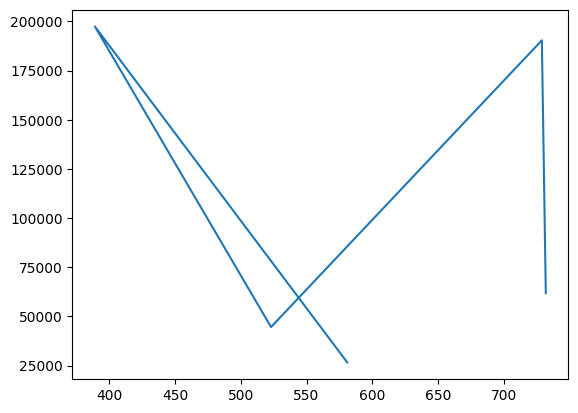

In [15]:
import matplotlib.pyplot as plt
plt.plot(dataFrame1['Credit_Score'], dataFrame1['Income'])



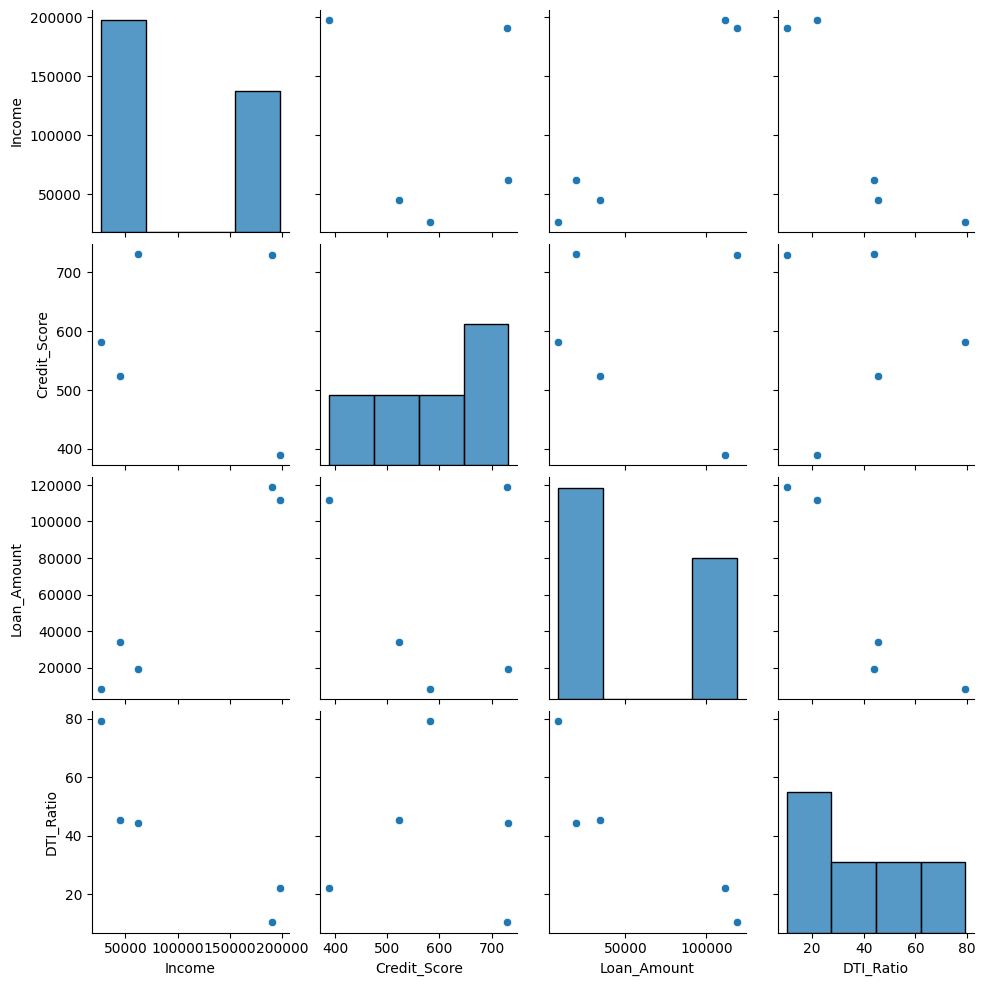

In [16]:
import seaborn as sbn

sbn.pairplot(dataFrame1)

In [17]:
print(dataFrame['DTI_Ratio'].mode())
print(dataFrame['Approval'].mode())

0    18.24
1    26.15
Name: DTI_Ratio, dtype: float64
